In [85]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [86]:
data = {'month' : [1,2,3,4,5,6,7,8,9,10,11,12], 'Sales' : [5384, 8081, 10282, 9156, 6118, 9139, 12460, 10717, 7825, 9693, 15177, 10990]}

In [87]:
df = pd.DataFrame(data)

In [88]:
df.head(12)

,month,Sales
0,1,5384
1,2,8081
2,3,10282
3,4,9156
4,5,6118
5,6,9139
6,7,12460
7,8,10717
8,9,7825
9,10,9693


## Visualusing Series Pattern

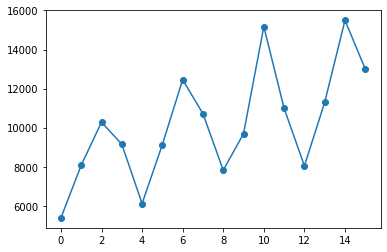

In [107]:
plt.plot(df['Sales'], label = "Sales", marker='o')

### The pattern shows that on every 2nd month there is a peak, and every 4th month shows a heavy decline. Regardless, the sales have grown overall in a steady way.

In [90]:
for i in range(13, 17):
    df = df.append({'month': i, 'Sales': 0}, ignore_index = True)
    
print(df)

    month  Sales
0       1   5384
1       2   8081
2       3  10282
3       4   9156
4       5   6118
5       6   9139
6       7  12460
7       8  10717
8       9   7825
9      10   9693
10     11  15177
11     12  10990
12     13      0
13     14      0
14     15      0
15     16      0


### Simple Moving Average k=3

In [91]:

for i in range(0,18):
    s = 0
    if(i >= 3):
        s += df.at[i-1,'Sales']
        s += df.at[i-3, 'Sales']
        s += df.at[i-2, 'Sales']
    if(s > 0):
        df.at[i, 'avg']=(s/3)
    else:
        df.at[i, 'avg']=(0)    
df.head(16)

,month,Sales,avg
0,1.0,5384.0,0.000000
1,2.0,8081.0,0.000000
2,3.0,10282.0,0.000000
3,4.0,9156.0,7915.666667
4,5.0,6118.0,9173.000000
5,6.0,9139.0,8518.666667
6,7.0,12460.0,8137.666667
7,8.0,10717.0,9239.000000
8,9.0,7825.0,10772.000000
9,10.0,9693.0,10334.000000


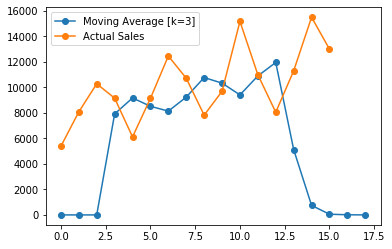

In [106]:
plt.plot(df['avg'], label="Moving Average [k=3]", marker='o')
plt.plot(df['Sales'], label="Actual Sales", marker='o')
plt.legend()

### Exponential Moving Average

## 3. Predict future demand in months 13-16 with seasonality

Calculating average sales for each season

In [93]:
season_1 = df[0:3]
season_2 = df[4:7]
season_3 = df[8:11]
season_4 = df[12:15]
seasons = [season_1, season_2, season_3]
season_avg = []
ind = 0
for f in seasons:
    ind += 1
    s = 0
    for o in f.Sales:
        s += o
    a = s / 4;
    season_avg.append(a)
    print("Average Sales (Season "+str(ind)+"): "+str(a))

Average Sales (Season 1): 5936.75
Average Sales (Season 2): 6929.25
Average Sales (Season 3): 8173.75


Average Sales (Season 4; Predicted):9741.759634225997


C:\Users\Pube\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RankWarning: Polyfit may be poorly conditioned
  This is separate from the ipykernel package so we can avoid doing imports until


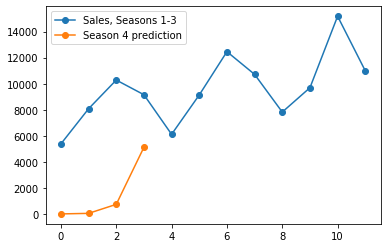

In [105]:
season = np.array([1,2,3])
avg_arr = np.array(season_avg)
fit = np.polyfit(season, avg_arr, 3)
poly = np.poly1d(fit)
print("Average Sales (Season 4; Predicted):"+ str(poly(4)))

plt.plot(df['Sales'][0:12], label="Sales, Seasons 1-3", marker='o')
plt.plot(poly, label="Season 4 prediction", marker='o')
plt.legend()

## Mean Absolute Deviation (MAD)

In [100]:
#adding ground truth
df['Sales'][12] = 8050
df['Sales'][13] = 11300
df['Sales'][14] = 15500
df['Sales'][15] = 13000

months = 4

df.head(20)

sum_actual = 0
sum_forecast = 0

for i in range(12,15+1):
    sum_actual += df['Sales'][i]
    sum_forecast += df['avg'][i]

MAD = (sum_actual - sum_forecast) / months
print("Mean Absolute Deviation (MAD) = "+str(MAD))

Mean Absolute Deviation (MAD) = 7492.958734759416


## Mean Square Error

In [101]:
months = 4

total = 0

for i in range(12,15+1):
    total += (df['Sales'][i] - df['avg'][i]) ** 2

MSE = total / months
print("Mean Square Error (MSE) = "+str(MSE))

Mean Square Error (MSE) = 109662088.07947409


#### Conclusion
These error values show conclusively that something went wrong in my earlier calculations, as the error rates are very high.